<a href="https://colab.research.google.com/github/mjl-ai/Plantilla-de-Proyecto-Final---Machine-Learning/blob/main/Grupo_4_Plantilla_de_Proyecto_Final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descripción de la actividad**

Trabajas en una empresa de tecnología y el gerente te ha pedido desarrollar un modelo de aprendizaje supervisado que pueda predecir el precio de las laptops a partir de sus especificaciones.

* La empresa ha recopilado datos de más de 1300 laptops (ver anexo), incluyendo información como la marca, el modelo, el tamaño de la pantalla, la capacidad de almacenamiento, la memoria RAM, el procesador, la tarjeta gráfica y el sistema operativo.

* Con estos datos, tu objetivo es construir un modelo que pueda predecir de manera precisa el precio de una laptop dada.

* Deberás presentar un notebook detallando las etapas del flujo de trabajo de tu solución de machine learning para el caso descrito


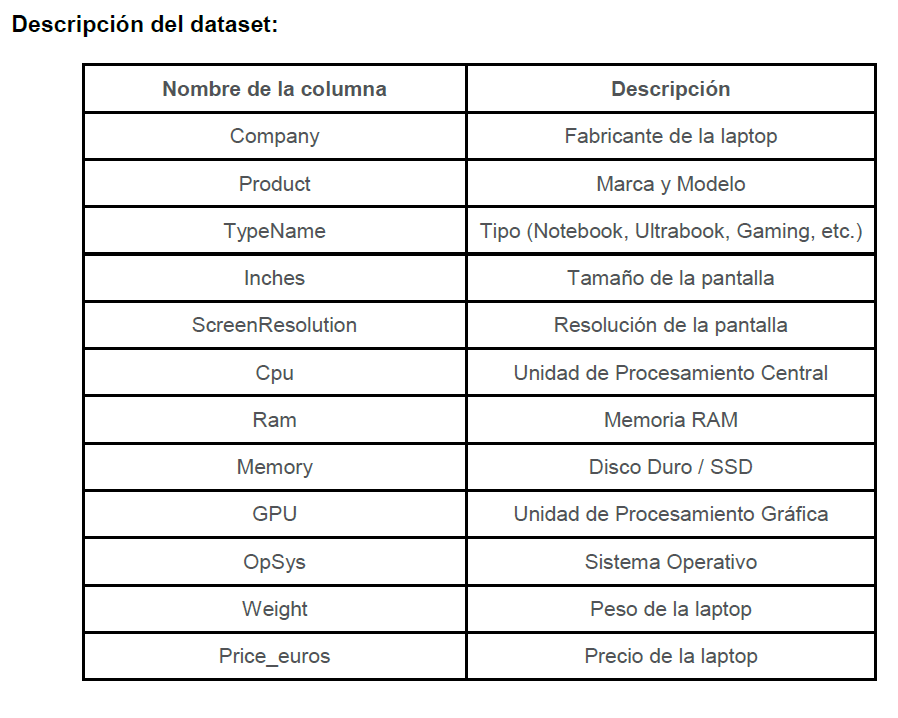

# **CRITERIO 1) Análisis exploratorio de datos**

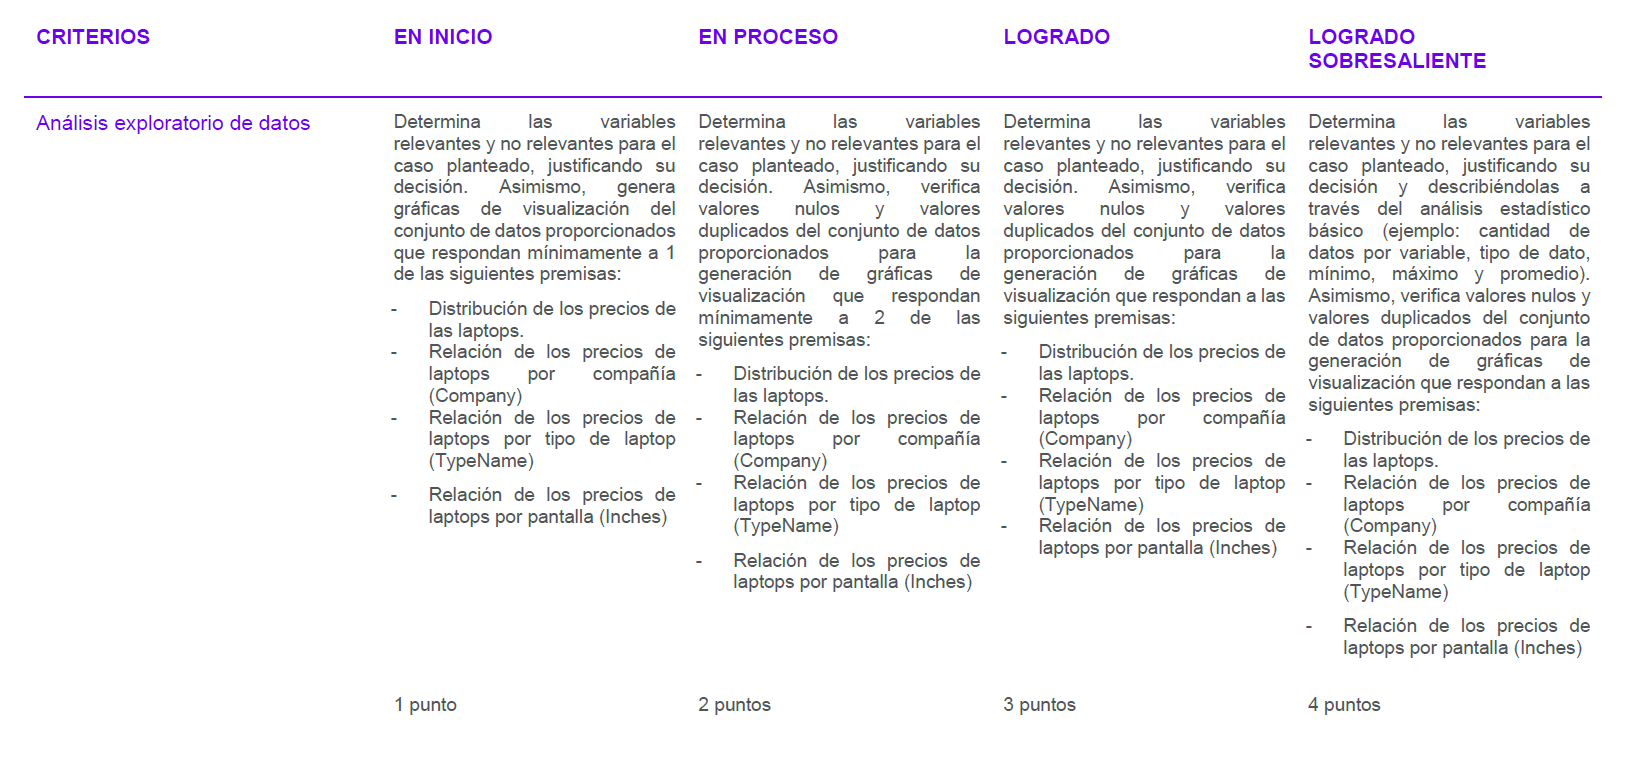

Visualizaciones: Analisis Exploratorio de los Datos

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


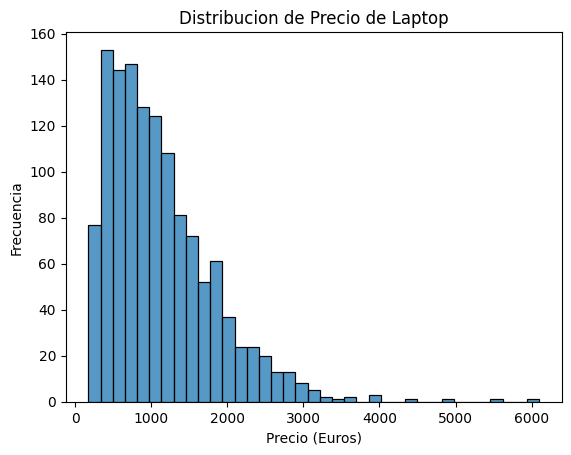

In [3]:
sns.histplot(df["Price_euros"])
plt.title("Distribucion de Precio de Laptop")
plt.xlabel("Precio (Euros)")
plt.ylabel("Frecuencia")
plt.show()

Insights: Al parecer la mayoria de laptops esta rondando los 1000 euros, este DataSet tiene pocas laptops de alta gama

In [ ]:
# Tarea 1: Completar los otros 3 graficos y agregar sus interpretaciones (insights)

In [ ]:
# grafico 2

In [4]:
plt.figure( figsize = (15, 10) )

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

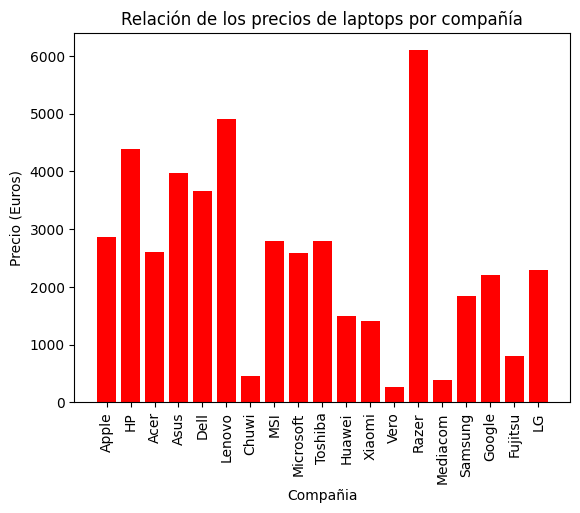

In [5]:
plt.bar(df["Company"], df["Price_euros"], color='red')
plt.title("Relación de los precios de laptops por compañía")
plt.xlabel("Compañia")
plt.xticks(rotation=90)
plt.ylabel("Precio (Euros)")
plt.show()

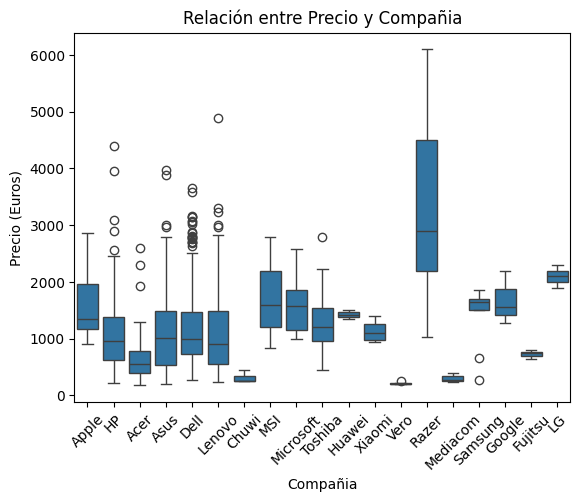

In [49]:
sns.boxplot(data=df, x='Company', y='Price_euros')
plt.title('Relación entre Precio y Compañia')
plt.xlabel('Compañia')
plt.ylabel('Precio (Euros)')
plt.xticks(rotation=45)
plt.show()

Insights: La marca mas cara de laptop es Razer y la mas economica es Vero

In [ ]:
# grafico 3

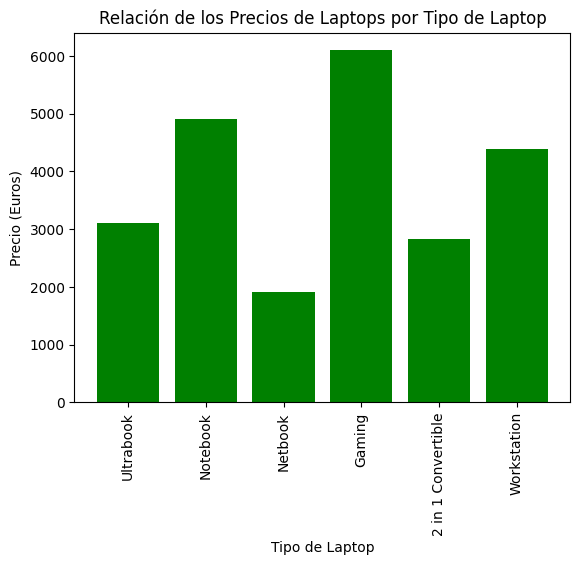

In [6]:
plt.bar(df["TypeName"], df["Price_euros"], color="green")
plt.title("Relación de los Precios de Laptops por Tipo de Laptop")
plt.xlabel("Tipo de Laptop")
plt.xticks(rotation=90)
plt.ylabel("Precio (Euros)")
plt.show()

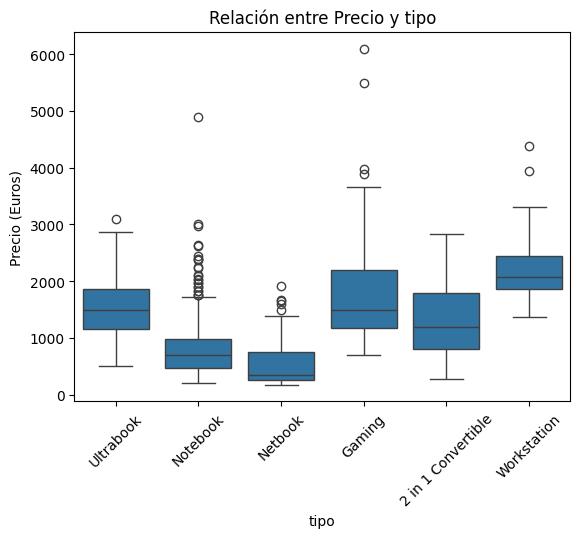

In [53]:
sns.boxplot(data=df, x='TypeName', y='Price_euros')
plt.title('Relación entre Precio y tipo')
plt.xlabel('tipo')
plt.ylabel('Precio (Euros)')
plt.xticks(rotation=45)
plt.show()

Insights:

El tipo de laptop segun el precio de mayor a menor es:

1. Laptop Gaming
2. Laptop Notebook
3. Laptop Workstation
4. Laptop Ultrabook
5. Laptop 2 in 1 Convertible
6. Laptop Netbook

El tipo de laptop mas caro es el Gaming.
El tipo de laptop mas economico es el Netbook

In [ ]:
# grafico 4

Text(0, 0.5, 'Precio (Euros)')

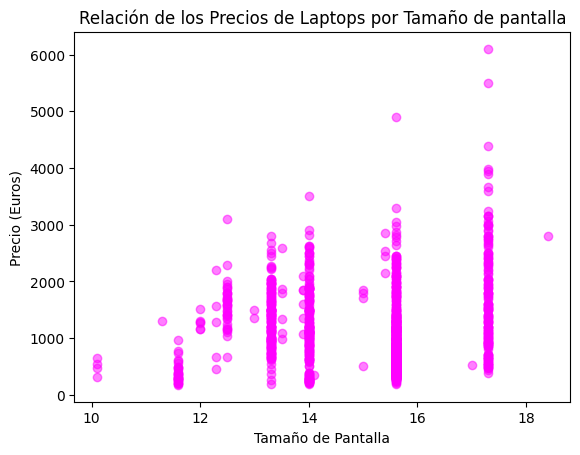

In [7]:
plt.scatter(df["Inches"], df["Price_euros"],  c= 'magenta', alpha=0.5)
plt.title("Relación de los Precios de Laptops por Tamaño de pantalla")
plt.xlabel('Tamaño de Pantalla')
plt.ylabel('Precio (Euros)')

Insights:
Se visualiza una tendencia que ha mayor tamaño de pantalla, el precio se incrementa.




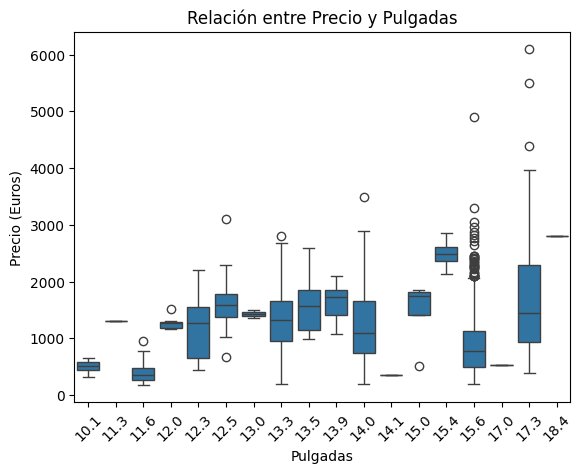

In [56]:
sns.boxplot(data=df, x='Inches', y='Price_euros')
plt.title('Relación entre Precio y Pulgadas')
plt.xlabel('Pulgadas')
plt.ylabel('Precio (Euros)')
plt.xticks(rotation=45)
plt.show()

# **CRITERIO 2) Ingeniería de características (Feature)**

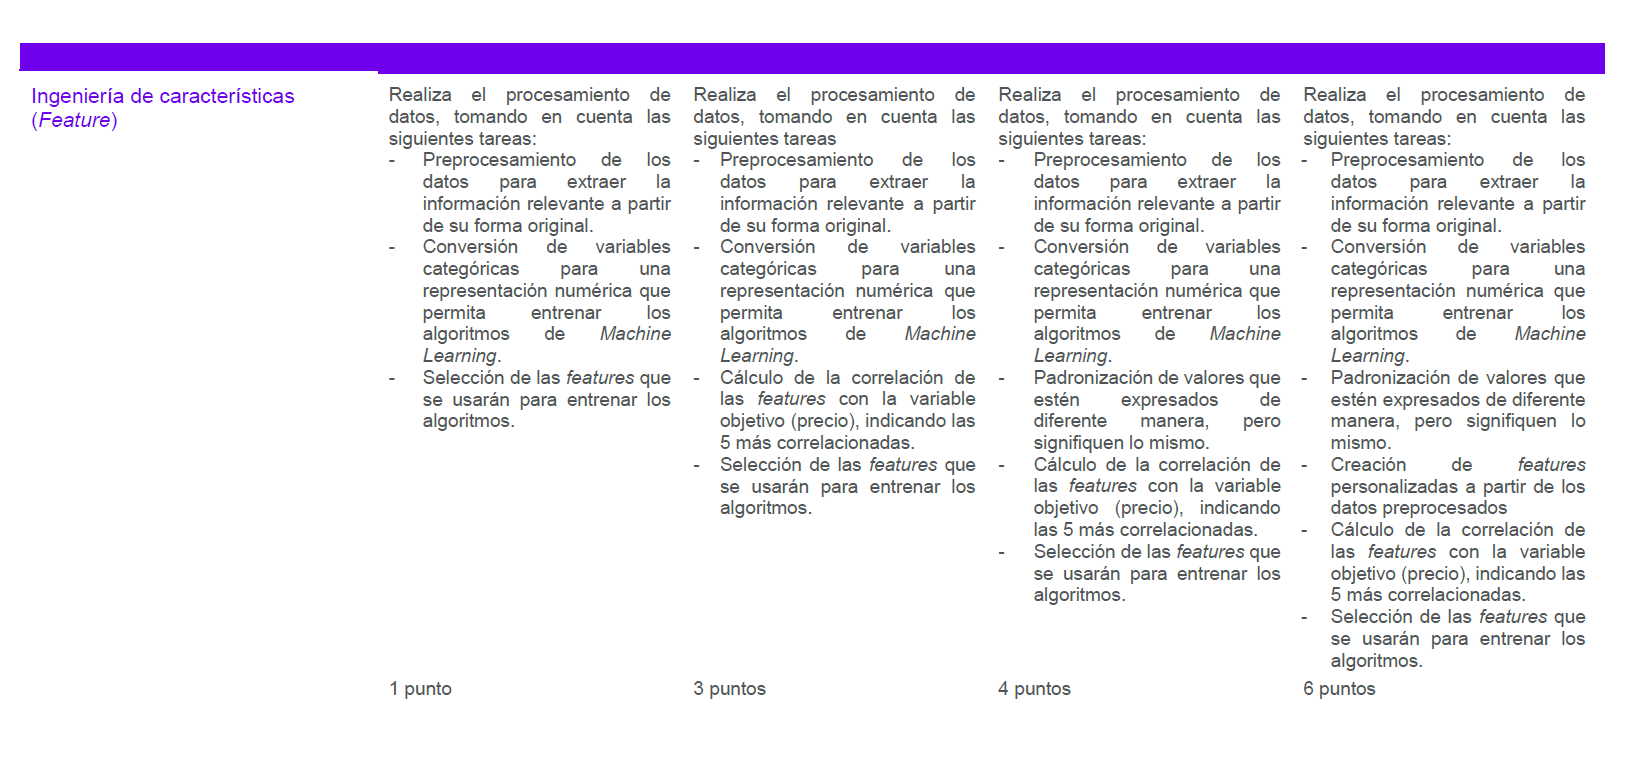

In [ ]:
df.head()

In [ ]:
df.info()

In [57]:
# Columna: Weight (peso de la laptop)

df['Weight']= df['Weight'].str.replace('kg', '').astype('float')

In [77]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [58]:
# Columna: OpSys (sistemas operativos)

df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [59]:
# OHE en columna OpSys

df = pd.get_dummies(df, columns=['OpSys'], dtype='int')

In [80]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,0,0,0,0,0,0,0,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,0,0,0,0,0,0,0,0,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,575.00,0,0,0,0,1,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,2537.45,0,0,0,0,0,0,0,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,0,0,0,0,0,0,0,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   ScreenResolution    1303 non-null   object 
 6   Cpu                 1303 non-null   object 
 7   Ram                 1303 non-null   object 
 8   Memory              1303 non-null   object 
 9   Gpu                 1303 non-null   object 
 10  Weight              1303 non-null   float64
 11  Price_euros         1303 non-null   float64
 12  OpSys_Android       1303 non-null   int64  
 13  OpSys_Chrome OS     1303 non-null   int64  
 14  OpSys_Linux         1303 non-null   int64  
 15  OpSys_Mac OS X      1303 non-null   int64  
 16  OpSys_

In [60]:
df[['screen_width', 'screen_height']] = df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(int)

In [13]:
df.head()

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,...,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,screen_width,screen_height
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,...,0,1,0,0,0,0,1,0,2560,1600
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,...,0,1,0,0,0,0,1,0,1440,900
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,...,0,0,0,0,0,1,0,0,1920,1080
3,4,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,...,0,1,0,0,0,0,1,0,2880,1800
4,5,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,...,0,1,0,0,0,0,1,0,2560,1600


In [ ]:
#df.info()

In [ ]:
# Tarea 2:
# 1) Convertir a numerico: la columna Ram
# 2) Ubicar que 1 columna puede ser usada para OHE y aplicar OHE

In [61]:
# Tarea 2:
# 1) Convertir a numerico: la columna Ram
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [ ]:
df.head()

In [ ]:
df.info()

In [62]:
# 2) Ubicar que 1 columna puede ser usada para OHE y aplicar OHE
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [63]:
df = pd.get_dummies(df, columns=['TypeName'], dtype='int')

In [ ]:
df.head()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Company                      1303 non-null   object 
 2   Product                      1303 non-null   object 
 3   Inches                       1303 non-null   float64
 4   ScreenResolution             1303 non-null   object 
 5   Cpu                          1303 non-null   object 
 6   Ram                          1303 non-null   int64  
 7   Memory                       1303 non-null   object 
 8   Gpu                          1303 non-null   object 
 9   Weight                       1303 non-null   float64
 10  Price_euros                  1303 non-null   float64
 11  OpSys_Android                1303 non-null   int64  
 12  OpSys_Chrome OS              1303 non-null   int64  
 13  OpSys_Linux       

In [ ]:
# Feature Selection (Seleccion de Caracteristicas)

# Metodo: Matriz de Correlacion

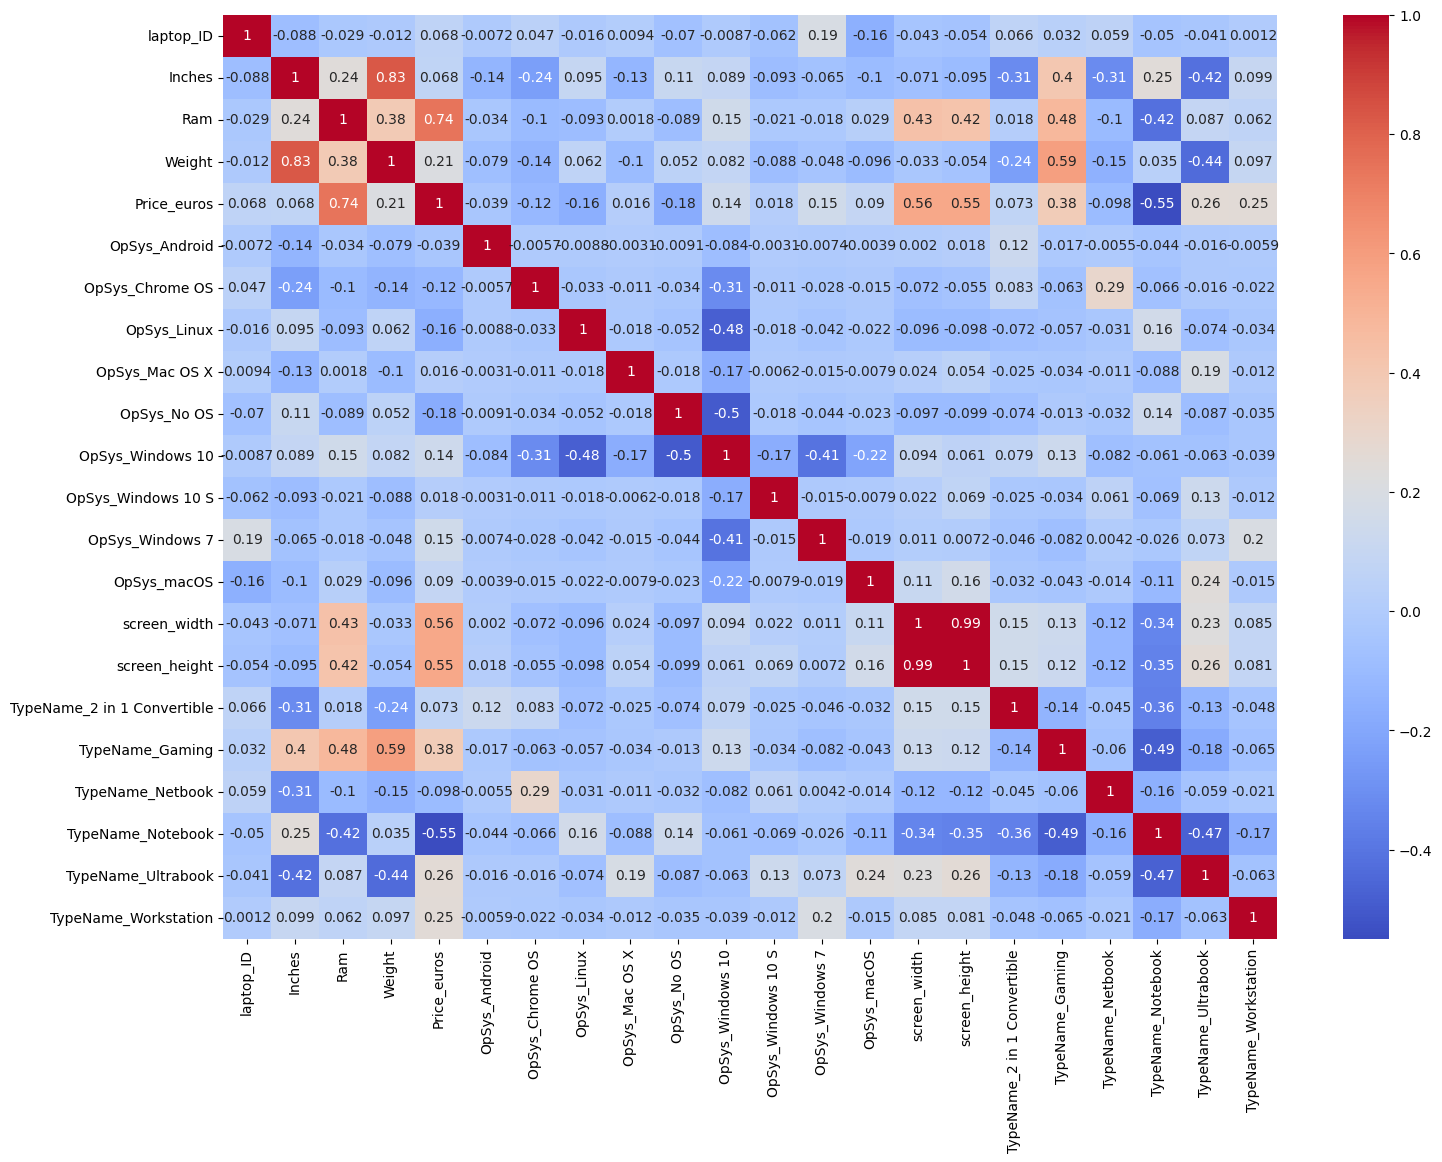

In [64]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

# **CRITERIO 3) Fase de entrenamiento**

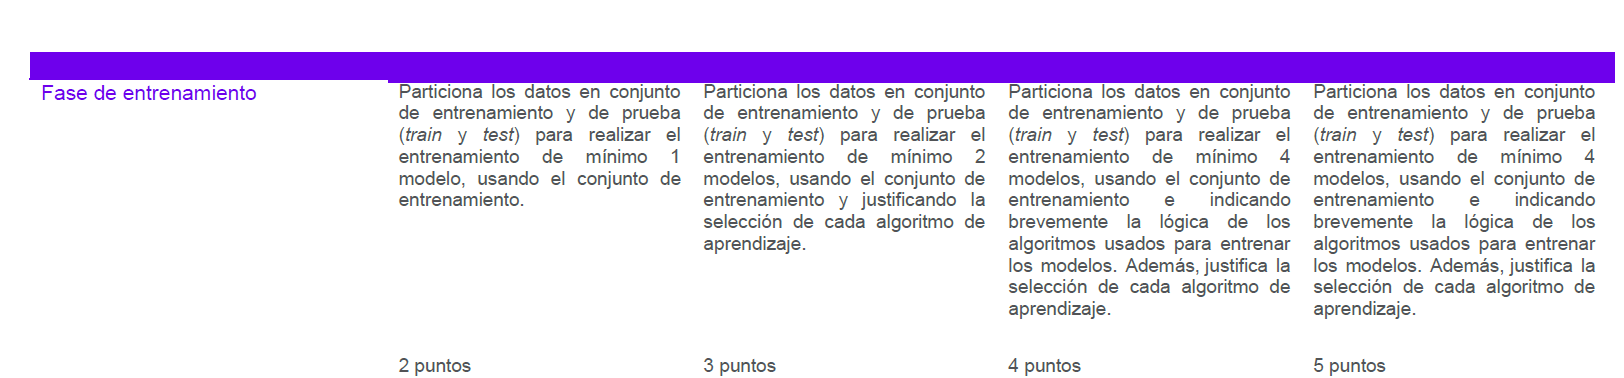

In [18]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'Weight', 'Price_euros', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'screen_width', 'screen_height'],
      dtype='object')

In [65]:
# feature selection
X = df[['Ram', 'TypeName_Notebook', 'screen_width', 'screen_height']]
y = df['Price_euros']

In [66]:
X

,Ram,TypeName_Notebook,screen_width,screen_height
0,8,0,2560,1600
1,8,0,1440,900
2,8,1,1920,1080
3,16,0,2880,1800
4,8,0,2560,1600
...,...,...,...,...
1298,4,0,1920,1080
1299,16,0,3200,1800
1300,2,1,1366,768
1301,6,1,1366,768


In [67]:
y

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1298,638.00
1299,1499.00
1300,229.00
1301,764.00


In [ ]:
# Tarea 3: Feature Selection

# Seleccione las columnas que usara para entrenar su modelo
# (use la matriz de correlacion y seleccion las columnas con mayor correlacion con la variable objetivo)


In [68]:
# Division de los Datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [69]:
# Algoritmo 1: Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
# Evaluando este modelo:
y_pred = lr.predict(X_test)
y_pred

array([ 950.68550014,  950.68550014,  807.58589346,  950.68550014,
        841.21283515, 1308.19580747,  664.48628678,  769.90174118,
       1308.19580747,  664.48628678, 2507.40332112,  950.68550014,
       1726.06853209,  769.90174118, 1880.59423419, 1308.19580747,
       1726.06853209,  950.68550014, 1056.10095454, 1880.59423419,
       1880.59423419,  483.70252782, 1308.19580747,  639.91679352,
       1308.19580747, 1594.39502083,  483.70252782,  483.70252782,
       1308.19580747,  950.68550014,  626.8021345 , 1308.19580747,
       1308.19580747, 1308.19580747,  950.68550014,  950.68550014,
        950.68550014,  664.48628678, 1308.19580747,  340.60292114,
       1369.77214004,  950.68550014, 1127.41204851, 1880.59423419,
        483.70252782,  950.68550014, 1880.59423419,  340.60292114,
        950.68550014, 1308.19580747, 1308.19580747,  769.90174118,
        950.68550014,  483.70252782,  769.90174118, 1308.19580747,
        340.60292114, 1308.19580747,  950.68550014,  950.68550

In [71]:
# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error, r2_score
mae_lr =mean_absolute_error(y_test, y_pred)
r2_lr =r2_score(y_test, y_pred)
print('MAE:', mae_lr)
print('R2:', r2_lr)

MAE: 305.9830150364545
R2: 0.6708120025885451


In [72]:
#Precio promedio
df['Price_euros'].mean()

1123.6869915579432

In [36]:
305/1123 * 100

27.15939447907391

In [73]:
# Tarea 4: Use Random Forest (Bosque Aleatorio) para Regresion
#  Entrenen su modelo
#  Evaluen el modelo

# from sklearn.ensemble import RandomForestRegressor

# Algoritmo 2: Random Forest
#  Entrenen su modelo
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
#  Evaluen el modelo
y_pred2 = rf.predict(X_test)
y_pred2

array([1042.694259  , 1042.694259  ,  610.48272238, 1042.694259  ,
        641.82466722, 1368.08844441,  610.64493431,  631.63674764,
       1368.08844441,  610.64493431, 2278.01093683, 1042.694259  ,
       1445.0611822 ,  631.63674764, 1900.22906261, 1368.08844441,
       1445.0611822 , 1042.694259  ,  654.62392575, 1900.22906261,
       1900.22906261,  498.19981987, 1368.08844441,  610.64493431,
       1368.08844441, 1465.45158214,  498.19981987,  498.19981987,
       1368.08844441, 1042.694259  ,  595.94321762, 1368.08844441,
       1368.08844441, 1368.08844441, 1042.694259  , 1042.694259  ,
       1042.694259  ,  610.64493431, 1368.08844441,  268.72575692,
       1503.95876667, 1042.694259  , 1294.13856183, 1900.22906261,
        498.19981987, 1042.694259  , 1900.22906261,  268.72575692,
       1042.694259  , 1368.08844441, 1368.08844441,  631.63674764,
       1042.694259  ,  498.19981987,  631.63674764, 1368.08844441,
        268.72575692, 1368.08844441, 1042.694259  , 1042.69425

In [75]:
# MAE (Mean Absolute Error)
# R2  (coeficiente de determinación)
mae_rf = mean_absolute_error(y_test, y_pred2)
r2_rf = r2_score(y_test, y_pred2)
print('MAE:', mae_rf)
print('R2:', r2_rf)

MAE: 292.5501505393222
R2: 0.6858762003346945


In [77]:
292/1123 * 100

26.001780943900265

In [78]:
# Algoritmo 3 Decision Tree
#  Entrenen su modelo
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
# Evaluando este modelo:
y_pred3 = dt.predict(X_test)
y_pred3

array([1045.72760976, 1045.72760976,  611.25952381, 1045.72760976,
        644.6368    , 1368.55703518,  613.09623853,  637.265     ,
       1368.55703518,  613.09623853, 2262.70529412, 1045.72760976,
       1440.61      ,  637.265     , 1902.56638889, 1368.55703518,
       1440.61      , 1045.72760976,  651.495     , 1902.56638889,
       1902.56638889,  499.15785276, 1368.55703518,  613.09623853,
       1368.55703518, 1443.575     ,  499.15785276,  499.15785276,
       1368.55703518, 1045.72760976,  590.875     , 1368.55703518,
       1368.55703518, 1368.55703518, 1045.72760976, 1045.72760976,
       1045.72760976,  613.09623853, 1368.55703518,  267.58333333,
       1569.5       , 1045.72760976, 1287.95      , 1902.56638889,
        499.15785276, 1045.72760976, 1902.56638889,  267.58333333,
       1045.72760976, 1368.55703518, 1368.55703518,  637.265     ,
       1045.72760976,  499.15785276,  637.265     , 1368.55703518,
        267.58333333, 1368.55703518, 1045.72760976, 1045.72760

In [80]:
# MAE (Mean Absolute Error)
# R2  (coeficiente de determinación)
mae_dt= mean_absolute_error(y_test, y_pred3)
r2_dt= r2_score(y_test, y_pred3)
print('MAE:', mae_dt)
print('R2:', r2_dt)

MAE: 295.8046162448174
R2: 0.6730766378383153


In [48]:
295/1123 * 100

26.268922528940337

In [ ]:
#Conclusión
#cual es el mejor y porque (Explainability, interpretability, complexity, etc)
#interpretar diferencia entre MAE /R2 de cada modelo.

#Linear Regression
Es el Lineal Regression es el menos preciso con un porcentaje de error = 27.15.
El coeficiente de determinación R2 es = 0.670
El error absoluto medio (MAE) = 305. Es el mayor de los 3 modelos comparados.
El margen de error es mas alto, y el coeficiente de determinación R2 es el mas bajo de los 3 modelos comparados
#Decision Tree
Es el modelo que tiene un margen cercano al Ramdon Forest con un porcentaje de error = 26.26.
El coeficiente de determinación R2 es = 0.673
El error absoluto medio (MAE) = 295. Es el segundo mayor de los 3 modelos comparados. Muy cercano al de Random Forest.
El margen de error y el coeficiente de determinación R2 es el mas cercano a Random Forest.
#Random Forest
Tiene el menor porcentaje de error = 26 Es el mas preciso.
El coeficiente de determinación R2 es = 0.685. Es el mas cercano a 1, por lo que ofrece el mejor pronostico.
El error absoluto medio (MAE) = 292. Es el menor de los 3 modelos comparados.
El porcentaje de error es el minimo, y el coeficiente de determinación R2 es el mejor de los 3 modelos comparados

#cual es el mejor y porque
Elegimos el algoritmo Ramdon Forest.
Porque tiene el menor porcentaje de error, y su coeficiente de determinación es el mas cercano a 1.
Por lo cual el mas preciso para pronosticar los precios de las laptops. Y al ser
la variable objetivo el precio de las laptops, no requiere ser interpretable ni explicable  para terceros.



# **CRITERIO 4) Fase de inferencia**

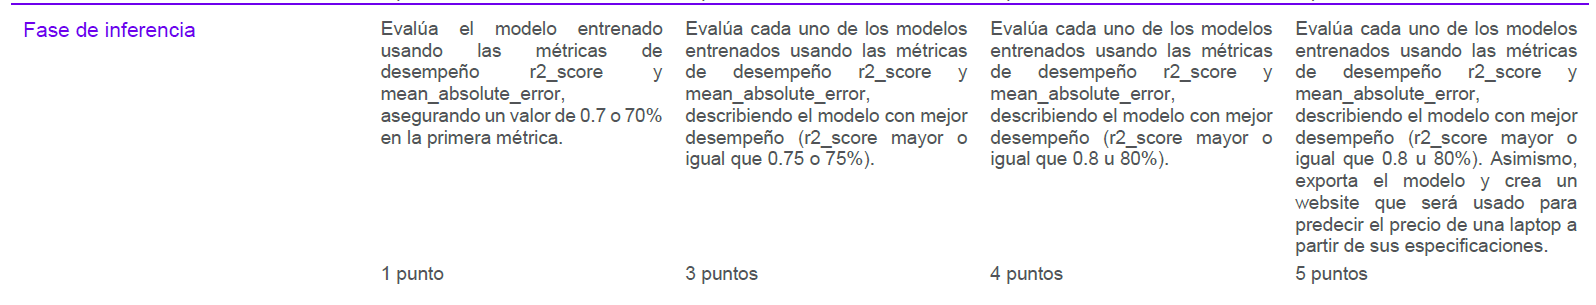

In [ ]:
# Tarea 5
# url del repositorio (1 punto)

# url del enlace (streamlit, flask, etc)
# bonus: crear linkedin, y compartir su repositorio con sus aprendizajes
# url post (repositorio) / imgles

# URL de su aplicacion web
# o
# Intento (el codigo que intentaron usar)

### **NOTA:** En caso crean una aplicacion web (pagina web) usando para predecir el precio de una laptop usando pickle o Streamlit, agregar el URL de la aplicacion web aqui:

URL:

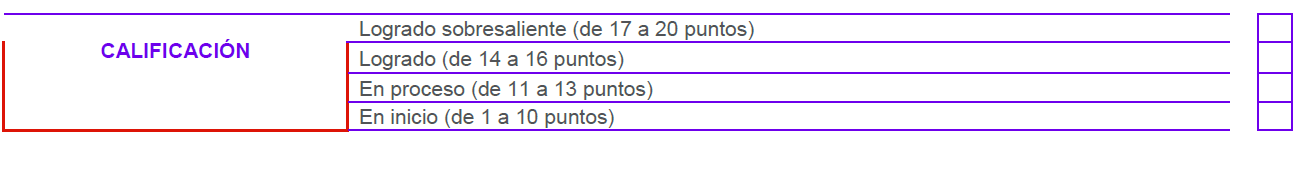